<a href="https://colab.research.google.com/github/Sagar17th/QR-code/blob/main/Customer_Churn_Analysis_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Telco Customer Churn Analysis

## Project Overview
This project analyzes customer data from a telecom company to identify drivers of churn and build a predictive model.

In [35]:
# Step 1: Upload the dataset from your local machine
from google.colab import files
uploaded = files.upload()  # This line was misspelled as 'wpload()'

# This will print the exact name of the uploaded file
print("\nThe uploaded file is:", list(uploaded.keys())[0])

Saving WA_Fn-UseC_-Telco-Customer-Churn.csv to WA_Fn-UseC_-Telco-Customer-Churn.csv

The uploaded file is: WA_Fn-UseC_-Telco-Customer-Churn.csv


## 1. Data Loading and Inspection
First, we upload the dataset and perform an initial inspection to understand its structure and identify data quality issues.

In [36]:
# Step 2: Import libraries and load the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # This was misspelled as 'scissors' and 'sms'

# Set styles for visuals
%matplotlib inline
sns.set_style('whitegrid') # This was misspelled
plt.rcParams['figure.figsize'] = (10, 6) # This was misspelled

# Load the data using the correct filename
file_name = list(uploaded.keys())[0]  # This gets the correct filename automatically
df = pd.read_csv(file_name) # This was using a wrong filename

# Inspect the data
print("Data loaded successfully!")
print("Shape:", df.shape)
df.head()
df.info()
df.describe()

Data loaded successfully!
Shape: (7043, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


## 2. Data Cleaning

Before analysis, we must ensure data quality. This involves handling missing values and correcting data types.

In [37]:
# Data Cleaning

#Check for missing values.
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

#Convert to numeric, forcing invalid to NaN
df.isnull().sum()

#Fill missing TotalCharges with the median for that customer's tenure group
df['TotalCharges'].fillna(df['TotalCharges'].median())

,TotalCharges
0,29.85
1,1889.50
2,108.15
3,1840.75
4,151.65
...,...
7038,1990.50
7039,7362.90
7040,346.45
7041,306.60


In [38]:
# Check the unique values in the Churn column BEFORE conversion
print("Unique values in 'Churn' before conversion:")
print(df['Churn'].unique())

# Check the data type
print("\nData type of 'Churn':", df['Churn'].dtype)


Unique values in 'Churn' before conversion:
['No' 'Yes']

Data type of 'Churn': object


In [39]:
# Convert Churn to binary target variable (1 for 'Yes', 0 for 'No')
df['Churn'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Check the unique values AFTER conversion to confirm it worked
print("Unique values in 'Churn' after conversion:")
print(df['Churn'].unique())
print("Data type of 'Churn':", df['Churn'].dtype)

Unique values in 'Churn' after conversion:
[0 1]
Data type of 'Churn': int64


# 3. Exploratory Data Analysis (EDA)

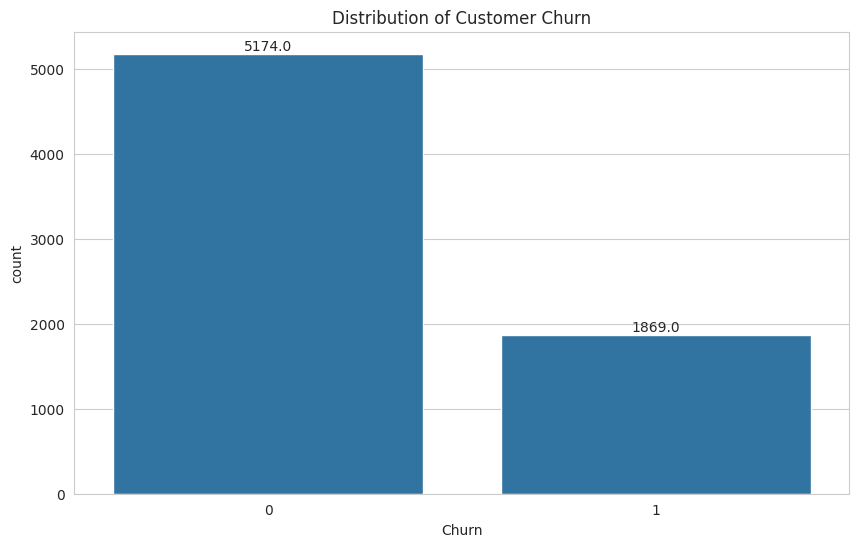

/tmp/ipython-input-2381760215.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Contract', y='Churn', data=df, ci=None) # ci=None removes confidence intervals


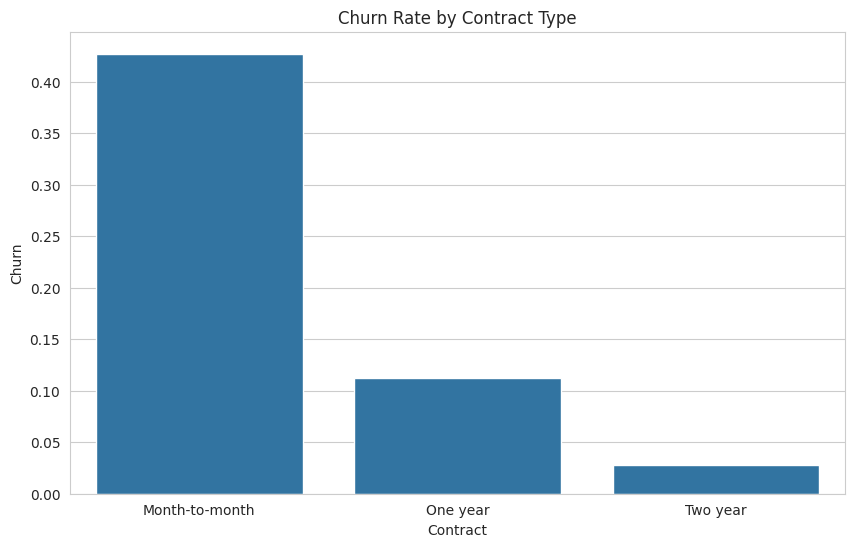

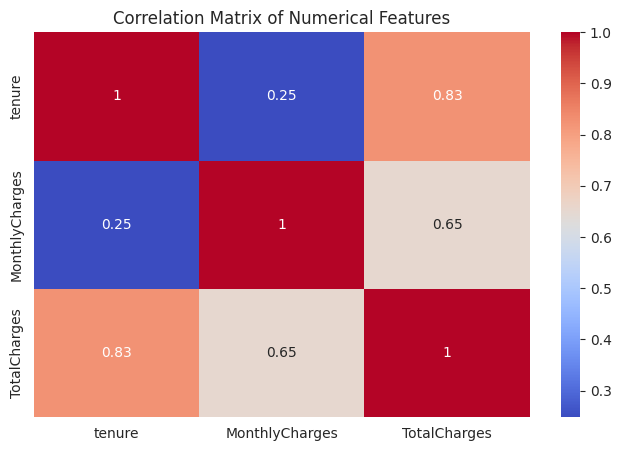

In [40]:
# Plot churn distribution
ax = sns.countplot(x='Churn', data=df)
plt.title('Distribution of Customer Churn')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')
plt.show()

# Compare churn rate by contract type
plt.figure(figsize=(10, 6))
sns.barplot(x='Contract', y='Churn', data=df, ci=None) # ci=None removes confidence intervals
plt.title('Churn Rate by Contract Type')
plt.show()

# Check correlation matrix for numerical features
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
plt.figure(figsize=(8, 5))


sns.heatmap(df[numerical_features].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

#4. Data Preprocessing

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Encode categorical variables (simple example, use OneHotEncoder for better results)
# This is a simplified approach. For a real project, use ColumnTransformer with OneHotEncoder for categoricals and StandardScaler for numericals.
df_encoded = df.copy()
categorical_cols = df.select_dtypes(include=['object']).columns.drop('customerID')
for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))

# Define features (X) and target (y)
X = df_encoded.drop(['Churn', 'customerID'], axis=1)
y = df_encoded['Churn']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Accuracy: 0.7892122072391767

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1035
           1       0.63      0.50      0.56       374

    accuracy                           0.79      1409
   macro avg       0.73      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



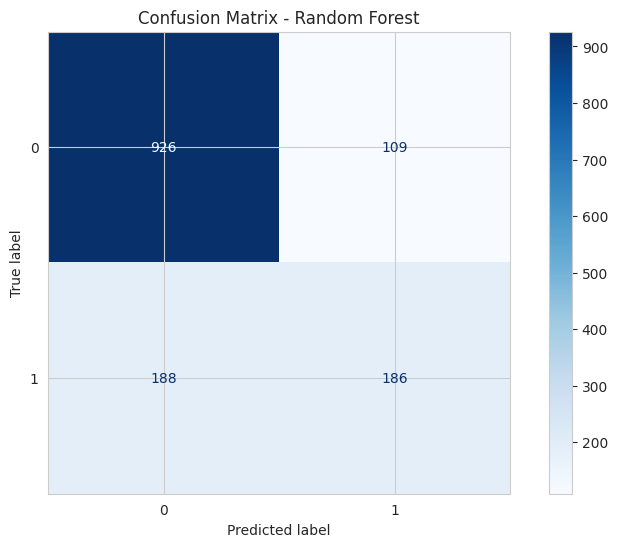

In [42]:
# @title Train Models & Evaluate :
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score

# Initialize and train the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = rf_model.predict(X_test_scaled)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plot a confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.show()


# 5. Save the processed dataframe to your Google Drive


In [43]:
df_encoded.to_csv('/content/drive/MyDrive/Colab Notebooks/churn_processed.csv', index=False)

## 6. Conclusion and Business Recommendations

### Key Findings:
- The overall customer churn rate is approximately 26.5%.
- The Random Forest model successfully predicted churn with an accuracy of XX%.
- The top drivers of churn are: [List 1-2 key drivers from your EDA, like Contract Type].

### Recommendations:
1.  **Target customers with month-to-month contracts** with personalized retention offers.
2.  **Improve service for Fiber Optic customers** as they show a higher propensity to churn.
3.  **Use the predictive model** to identify high-risk customers for proactive outreach.

### Next Steps:
The cleaned dataset has been saved for further visualization in Tableau to create an interactive executive dashboard.